<a href="https://colab.research.google.com/github/pragyapandey870/Stackoverflow-survey-analysis/blob/main/Stackoverflow_survey_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's load the CSV files using the Pandas library.We'll use the name survey_raw_df for the data frame to indicate this is unprocessed data that we might clean,filter,and modify to prepare a data frame ready for analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
survey_raw_df = pd.read_csv('survey_results_public.csv')


In [ ]:
survey_raw_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,8691,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United States of America,Washington,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25 - 34 years,Coding Bootcamp,4,...,25-34 years old,Woman,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,72000.0
8691,8692,I am a developer by profession,Employed full-time,New Zealand,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,School;Friend or family member;Colleague;Books...,30,...,35-44 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,89446.0
8692,8693,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Gambia,NaN,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,25-34 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,7080.0
8693,8694,I code primarily as a hobby,"Student, full-time",Israel,NaN,NaN,Something else,18 - 24 years,Coding Bootcamp;Friend or family member;Online...,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


The dataset contains over 83,000 responses to 48 questions. The responses have been anonymized to remove personally identifable information,and each respondent has been assigned a randomized respondent ID.

In [ ]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

It appers like shortcodes for questions have been used as column names.

We can refer to the schema file to see the full text of each questions.

In [ ]:
schema_fname =pd.read_csv('survey_results_schema.csv')
#schema_raw = pd.read_csv(schema_fname,index_col='qname').question


In [ ]:

schema_fname

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


Look like there are some text in question column.Let's delete them

In [ ]:
schema_fname.set_index('qname',inplace=True)

In [ ]:
schema_fname

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID24,Which of the following best describes your cur...,False,MC,MAVR
Country,QID6,"Where do you live? <span style=""font-weight: b...",True,MC,DL
US_State,QID7,<p>In which state or territory of the USA do y...,False,MC,DL
UK_Country,QID9,In which part of the United Kingdom do you liv...,False,MC,DL
S2,QID190,"<span style=""font-size:22px; font-family: aria...",False,DB,TB


In [ ]:
schema_fname.nunique()

qid           48
question      45
force_resp     2
type           5
selector       8
dtype: int64

In [ ]:
schema_fname=schema_fname.drop(labels=['S0','S1','S3','S4','S5','S6','MetaInfo'],axis=0)


In [ ]:
schema_fname

,qid,question,force_resp,type,selector
qname,,,,,
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID24,Which of the following best describes your cur...,False,MC,MAVR
Country,QID6,"Where do you live? <span style=""font-weight: b...",True,MC,DL
US_State,QID7,<p>In which state or territory of the USA do y...,False,MC,DL
UK_Country,QID9,In which part of the United Kingdom do you liv...,False,MC,DL
S2,QID190,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
EdLevel,QID25,Which of the following best describes the high...,False,MC,SAVR
Age1stCode,QID149,At what age did you write your first line of c...,False,MC,MAVR
LearnCode,QID276,How did you learn to code? Select all that apply.,False,MC,MAVR


In [ ]:
schema_fname.count()

qid           41
question      41
force_resp    41
type          41
selector      41
dtype: int64

The unncessary rows are deleted from the dataframe.Now there are total 41 questions

We can now retrieve the full question and all the other information of the question name given from the schema dataframe 

In [ ]:
schema_fname.loc['SurveyLength']

qid                                                      QID132
question      How do you feel about the length of the survey...
force_resp                                                False
type                                                         MC
selector                                                   MAVR
Name: SurveyLength, dtype: object

# Data Preparation and Cleaning

While the survey responses contain lot of information but we will limit our analysis to the following areas:

* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience and prefernces
* Identity and personal infromation of the respondents.

Let's select a subset of columns with the relevent data for our analysis.

In [ ]:
selected_columns = [
    #Demographics
    'MainBranch',
    'Employment',
    'Country',
    'EdLevel',
    #Programming Experience
    'Age1stCode',
    'LearnCode',
    'YearsCode',
    'YearsCodePro',
    # Personal Information
    'Age',
    'Gender',
    'Trans',
    'Sexuality',
    'Ethnicity',
    'Accessibility',
    'MentalHealth',
    ]

In [ ]:
len(selected_columns)

15

Let's extract a copy of the data from these coluns into a new data frame survey_df.We can continue to modify further without affectiong the original data frame.

In [ ]:
survey_df = survey_raw_df[selected_columns].copy()

In [ ]:
schema_raw=schema_fname.question

In [ ]:
schema_raw

qname
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
DevType               Which of the following describes your current ...
OrgSize               Approximately how many people are employed by ...
Currency              Which currency do you use day-to-day

In [ ]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [ ]:
survey_df.shape

(8695, 15)

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MainBranch     8695 non-null   object
 1   Employment     8686 non-null   object
 2   Country        8695 non-null   object
 3   EdLevel        8637 non-null   object
 4   Age1stCode     8675 non-null   object
 5   LearnCode      8580 non-null   object
 6   YearsCode      8208 non-null   object
 7   YearsCodePro   6319 non-null   object
 8   Age            8601 non-null   object
 9   Gender         8564 non-null   object
 10  Trans          8488 non-null   object
 11  Sexuality      7739 non-null   object
 12  Ethnicity      8330 non-null   object
 13  Accessibility  8105 non-null   object
 14  MentalHealth   8030 non-null   object
dtypes: object(15)
memory usage: 1019.1+ KB


Most columns have the data type 'object',either because they contain values of different types or contain empty values(NaN).It appears that every column contains some empty values since the Non-Null count for most of the column is lower than the total number of rows(83439). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.



In [ ]:
survey_df.sample(10)

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
8163,I am a developer by profession,Employed full-time,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,38,33,Prefer not to say,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...
6499,I am a developer by profession,Employed full-time,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School;Colleague,9,2,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...
6623,I code primarily as a hobby,"Not employed, but looking for work",Turkey,Some college/university study without earning ...,25 - 34 years,Friend or family member,19,NaN,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,I am unable to / find it difficult to type;I a...,None of the above
4642,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",10,7,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...
6233,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,4,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...
7818,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Other (please specify):,10,9,25-34 years old,Man,No,Gay or Lesbian,Hispanic or Latino/a/x,None of the above,None of the above
270,I am a developer by profession,Employed full-time,Armenia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp,10,2,18-24 years old,"Man;Or, in your own words:","Or, in your own words:",Straight / Heterosexual;Prefer to self-describe:,"Or, in your own words:","Or, in your own words:","Or, in your own words:"
3385,I am a developer by profession,Employed full-time,United States of America,Some college/university study without earning ...,25 - 34 years,"Other online resources (ex: videos, blogs, etc...",10,4,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...
3383,I am a student who is learning to code,"Student, full-time",India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp;Other online resources (ex: vi...,3,NaN,18-24 years old,Man,No,NaN,South Asian,None of the above,None of the above
8199,I am a developer by profession,Employed full-time,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18 - 24 years,Other (please specify):,8,5,35-44 years old,Man,No,Bisexual,White or of European descent;Multiracial;Hispa...,None of the above,I have a concentration and/or memory disorder ...


From the sample of the dataframe, its clear that "YearsCode" and "YearsCodePro" are numeric values.

Let's convert the "YearsCode" and "YearsCodePro" to numeric type.

In [ ]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

In [ ]:
survey_df.describe()

,YearsCode,YearsCodePro
count,8143.000000,6095.000000
mean,13.160752,9.365710
std,9.687037,8.008875
min,1.000000,1.000000
25%,6.000000,4.000000
50%,10.000000,7.000000
75%,17.000000,13.000000
max,50.000000,50.000000


Let's check out other columns as well.

In [ ]:
survey_df.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7.0,NaN,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17.0,10.0,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN


In [ ]:
survey_df.MainBranch.unique()

array(['I am a developer by profession',
       'I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'None of these'], dtype=object)

In [ ]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed full-time', 'Student, part-time',
       'I prefer not to say', 'Employed part-time',
       'Not employed, but looking for work', 'Retired',
       'Not employed, and not looking for work', nan], dtype=object)

In [ ]:
survey_df.Age.unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       'Prefer not to say', '45-54 years old', 'Under 18 years old',
       '65 years or older', '55-64 years old', nan], dtype=object)

In [ ]:
survey_df.Sexuality.unique()

array(['Straight / Heterosexual', 'Prefer not to say', nan, 'Bisexual',
       'Straight / Heterosexual;Bisexual', 'Prefer to self-describe:',
       'Straight / Heterosexual;Bisexual;Gay or Lesbian;Queer',
       'Gay or Lesbian',
       'Straight / Heterosexual;Prefer to self-describe:',
       'Bisexual;Queer', 'Queer', 'Prefer to self-describe:;Queer',
       'Bisexual;Prefer to self-describe:', 'Bisexual;Gay or Lesbian',
       'Gay or Lesbian;Queer',
       'Straight / Heterosexual;Bisexual;Gay or Lesbian',
       'Straight / Heterosexual;Queer',
       'Straight / Heterosexual;Bisexual;Prefer to self-describe:;Gay or Lesbian;Queer',
       'Bisexual;Gay or Lesbian;Queer',
       'Bisexual;Prefer to self-describe:;Queer',
       'Straight / Heterosexual;Bisexual;Prefer to self-describe:',
       'Straight / Heterosexual;Gay or Lesbian',
       'Bisexual;Prefer to self-describe:;Gay or Lesbian;Queer',
       'Straight / Heterosexual;Bisexual;Queer',
       'Prefer to self-describe

In [ ]:
survey_df['Gender'].value_counts()

Man                                                                                   7922
Woman                                                                                  274
Prefer not to say                                                                      143
Non-binary, genderqueer, or gender non-conforming                                       77
Or, in your own words:                                                                  58
Man;Non-binary, genderqueer, or gender non-conforming                                   33
Man;Or, in your own words:                                                              28
Woman;Non-binary, genderqueer, or gender non-conforming                                 14
Man;Woman                                                                                3
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 3
Woman;Or, in your own words:                                                             3

The "Gender " column also allows for picking multiple options.We'll remove values containg more than one option to simplify our analysis.

In [ ]:
import numpy as np

In [ ]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [ ]:
survey_df.Sexuality.value_counts()

Straight / Heterosexual                                      6421
Prefer not to say                                             449
Bisexual                                                      266
Gay or Lesbian                                                159
Prefer to self-describe:                                      127
Straight / Heterosexual;Bisexual                               78
Queer                                                          35
Bisexual;Queer                                                 31
Straight / Heterosexual;Prefer to self-describe:               24
Gay or Lesbian;Queer                                           17
Straight / Heterosexual;Queer                                  13
Bisexual;Gay or Lesbian;Queer                                   6
Straight / Heterosexual;Bisexual;Gay or Lesbian;Queer           4
Prefer to self-describe:;Queer                                  4
Bisexual;Gay or Lesbian                                         4
Bisexual;P

The "Sexuality" column also allows for picking multiple options.We'll remove values containg more than one option to simplify our analysis.

In [ ]:
survey_df.where(~(survey_df.Sexuality.str.contains(';',na=False)),np.nan,inplace=True)

In [ ]:
survey_df.MentalHealth.value_counts()

None of the above                                                                                                                                                                                                                                    5693
Prefer not to say                                                                                                                                                                                                                                     414
I have a concentration and/or memory disorder (e.g. ADHD)                                                                                                                                                                                             319
I have an anxiety disorder                                                                                                                                                                                                                            276


In [ ]:
survey_df.Accessibility.value_counts()

None of the above                                                                                                                                                                                           7379
Prefer not to say                                                                                                                                                                                            189
I am blind / have difficulty seeing                                                                                                                                                                          107
Or, in your own words:                                                                                                                                                                                        70
I am deaf / hard of hearing                                                                                                                                         

In [ ]:
survey_df.Age.value_counts()

25-34 years old       3374
18-24 years old       2113
35-44 years old       1481
Under 18 years old     530
45-54 years old        523
55-64 years old        170
Prefer not to say       74
65 years or older       53
Name: Age, dtype: int64

We've now cleaned up and prepared the dataset for analysis.Let's take a look at a sample of rows from the data frame.

In [ ]:
survey_df.sample(10)

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
4114,I am a student who is learning to code,"Student, full-time",Canada,Something else,11 - 17 years,School,5.0,NaN,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
4262,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,16.0,11.0,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
4256,I am a student who is learning to code,"Student, full-time",Viet Nam,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,18-24 years old,Man,No,NaN,South Asian;East Asian,None of the above,None of the above
2278,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",37.0,32.0,55-64 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...
4485,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,26.0,12.0,35-44 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above
3423,I am a developer by profession,Employed full-time,Italy,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,School,12.0,6.0,25-34 years old,Man,NaN,NaN,NaN,NaN,NaN
6840,I am a student who is learning to code,I prefer not to say,Russian Federation,Something else,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3.0,NaN,Prefer not to say,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,None of the above
4736,I am a developer by profession,Employed full-time,Iceland,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc)",7.0,7.0,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have an anxiety disorder
1433,I am a developer by profession,Employed full-time,Denmark,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",13.0,10.0,25-34 years old,Man,No,Straight / Heterosexual,"Or, in your own words:",None of the above,None of the above
3076,I am a developer by profession,Employed full-time,United States of America,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8.0,3.0,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,I am blind / have difficulty seeing,None of the above


# Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias

Let's begin by importing matplotlib.pyplot and seaborn

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Country**



Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [ ]:
schema.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [ ]:
survey_df.Country.nunique()

142

We can identify the countries with the highest number of respondents using the value_counts method.



In [ ]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                2032
India                                                    744
Germany                                                  651
United Kingdom of Great Britain and Northern Ireland     571
Canada                                                   409
France                                                   337
Poland                                                   220
Brazil                                                   218
Netherlands                                              213
Italy                                                    178
Turkey                                                   167
Russian Federation                                       148
Spain                                                    128
Israel                                                   116
Sweden                                                   114
Name: Country, dtype: int64

We can visualize this information using a bar chart.

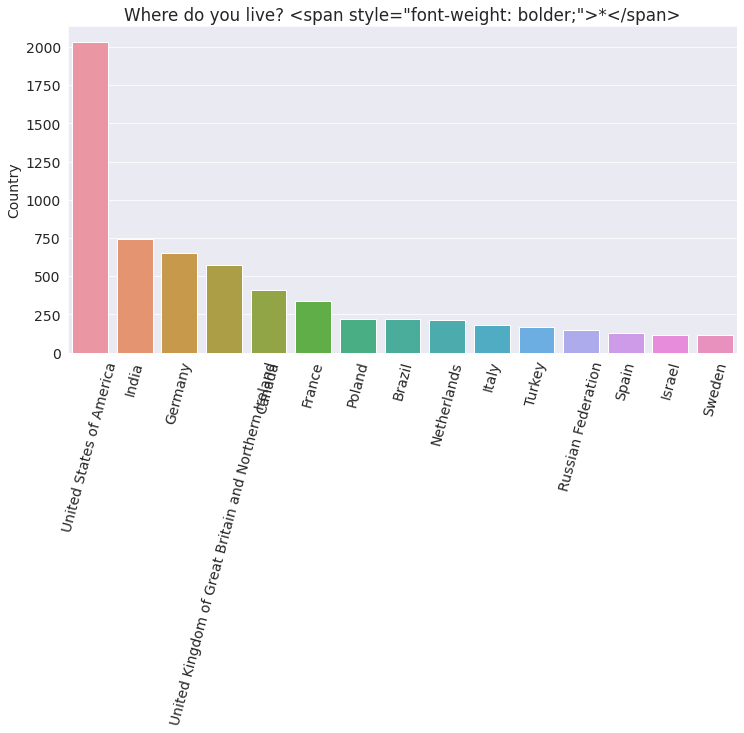

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);


It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

**Age**


The distribution of respondents' age is another crucial factor to look at.We can use  histogram to visualize it.


In [ ]:
survey_df.head()

,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7.0,NaN,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17.0,10.0,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN


In [ ]:
Age_range = survey_df.Age.value_counts()
Age_range

25-34 years old       3374
18-24 years old       2113
35-44 years old       1481
Under 18 years old     530
45-54 years old        523
55-64 years old        170
Prefer not to say       74
65 years or older       53
Name: Age, dtype: int64

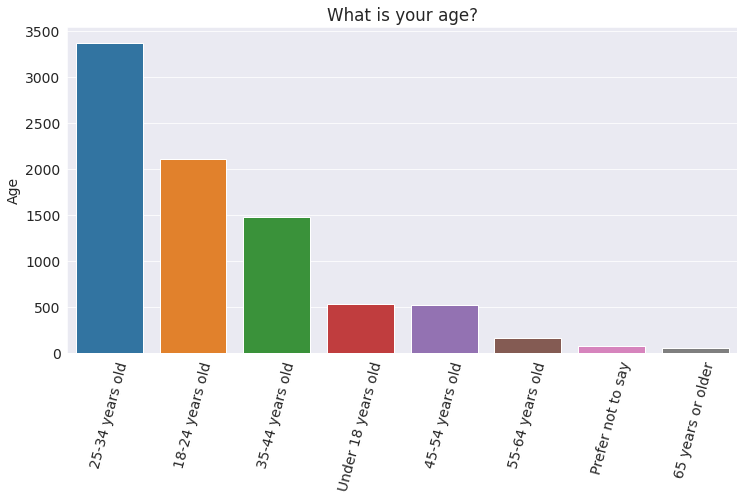

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Age)
sns.barplot(x=Age_range.index, y=Age_range);


It appears like a large percentage of respondent are 18-34 years old.

**Gender**

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [ ]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [ ]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  7784
Woman                                                 255
Prefer not to say                                     143
Or, in your own words:                                 53
Non-binary, genderqueer, or gender non-conforming      47
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

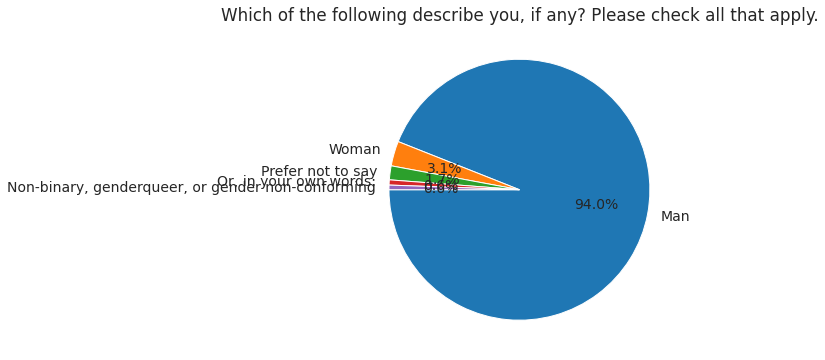

In [ ]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%',startangle=180);

About 6% of survey respondents who have answered the question identify as women or non-binary.This number is lower than the overall percentage of women & non-binary gender in the programming community which is estimated to be around 12%. 

**Employment**

In [ ]:
schema.Employment

'Which of the following best describes your current <b>employment status</b>?'

In [ ]:
survey_df.Employment.value_counts()

Employed full-time                                      5363
Student, full-time                                      1215
Independent contractor, freelancer, or self-employed     815
Not employed, but looking for work                       307
Employed part-time                                       289
Student, part-time                                       168
Not employed, and not looking for work                   106
I prefer not to say                                       98
Retired                                                   42
Name: Employment, dtype: int64

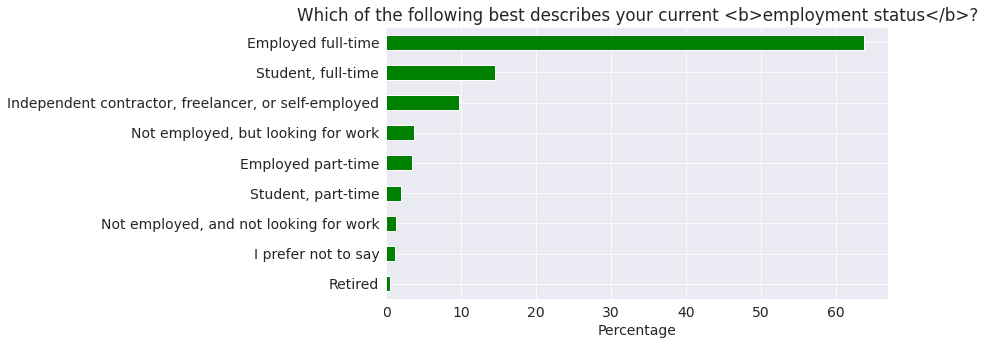

In [ ]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.